In [1]:
from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies.csv


In [2]:
import pandas as pd
df = pd.read_csv("movies.csv", encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [5]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

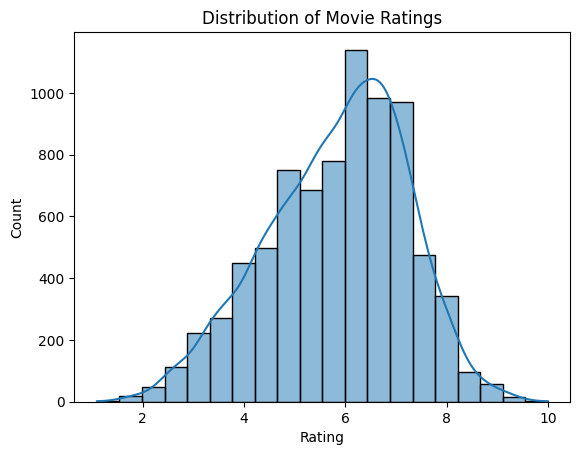

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [7]:
df = df.drop(['Name'], axis=1)
df.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col] = label.fit_transform(df[col])

df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,(2019),109 min,299,7.0,8,1548,3280,4790,527
2,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,(2010),105 min,299,NaN,NaN,385,3112,3462,405


In [10]:
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].fillna(df['Year'].median())


In [11]:
df.dtypes

,0
Year,float64
Duration,object
Genre,int64
Rating,float64
Votes,object
Director,int64
Actor 1,int64
Actor 2,int64
Actor 3,int64


In [12]:
def convert_money(x):
    if isinstance(x, str):
        x = x.replace('$','').replace(',','').strip()
        if 'M' in x:
            return float(x.replace('M','')) * 1_000_000
        elif 'K' in x:
            return float(x.replace('K','')) * 1_000
        else:
            return float(x)
    return x

df['Votes'] = df['Votes'].apply(convert_money)



In [15]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Year           0
Duration    1646
Genre          0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64
Year          0
Duration    422
Genre         0
Votes         0
Director      0
Actor 1       0
Actor 2       0
Actor 3       0
dtype: int64


In [22]:
# Remove 'min' and any spaces, replace non-numeric columns safely
X_train = X_train.replace(r'(\d+)\s*min', r'\1', regex=True)
X_test  = X_test.replace(r'(\d+)\s*min', r'\1', regex=True)

# Convert to numeric only after cleaning
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN using median of numeric columns only
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test  = X_test.fillna(X_train.median(numeric_only=True))


In [23]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.0304101624144728
Mean Squared Error (MSE): 1.669494139551623
R² Score: 0.10200978769488023


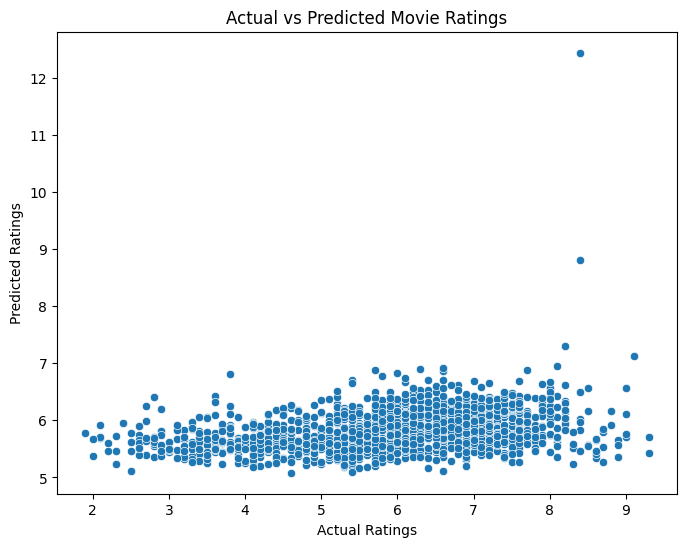

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()

In [28]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

    Feature  Coefficient
2     Genre     0.000891
7   Actor 3     0.000041
6   Actor 2     0.000040
5   Actor 1     0.000029
3     Votes     0.000020
4  Director     0.000005
1  Duration    -0.004684
0      Year    -0.013569


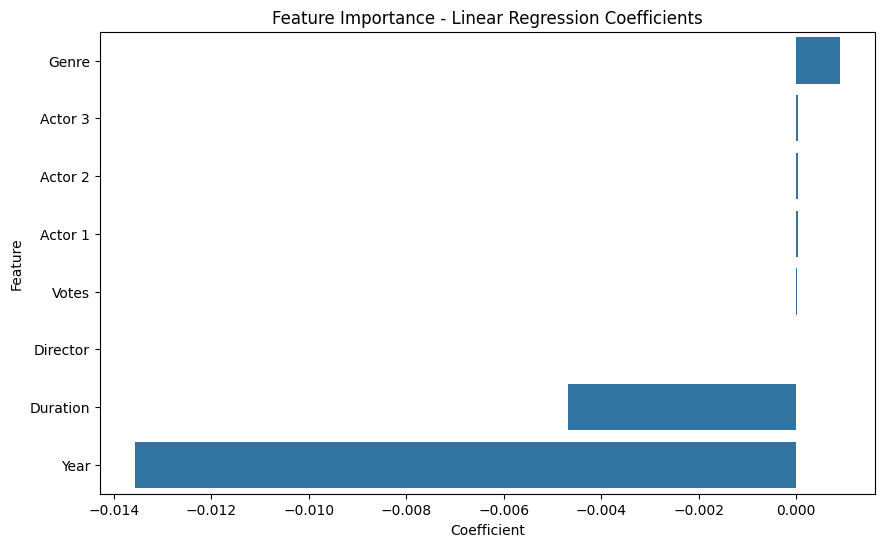

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance - Linear Regression Coefficients")
plt.show()